Mean Squared Error: 1748218.3377563732


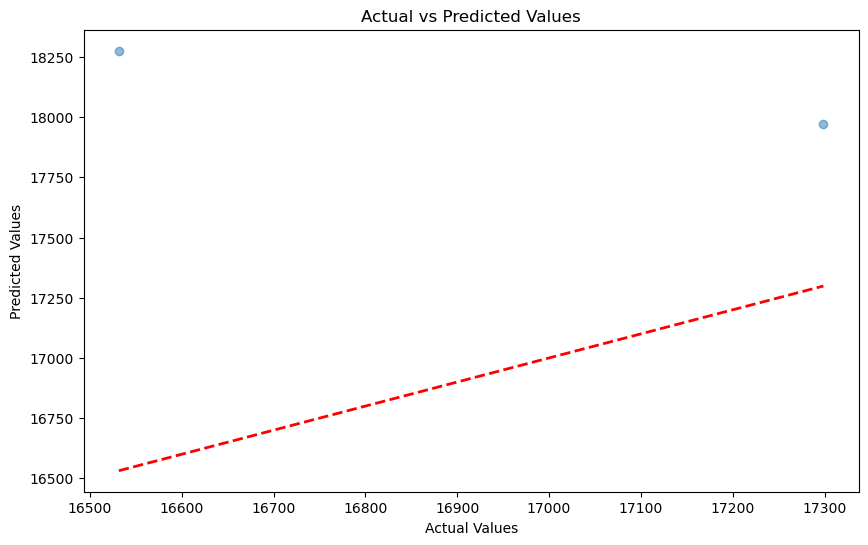

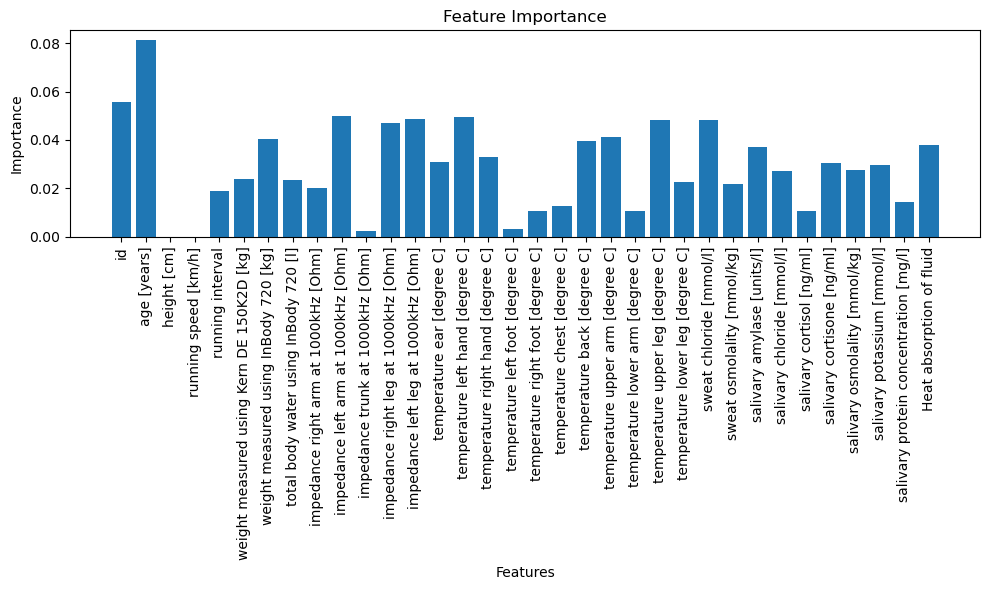

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the data
data = pd.read_csv('merged_dehydration_graphene.csv')

# Drop rows with missing values
data.dropna(inplace=True)

# Assuming the last column is the target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# Plot feature importances
feature_importance = model.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

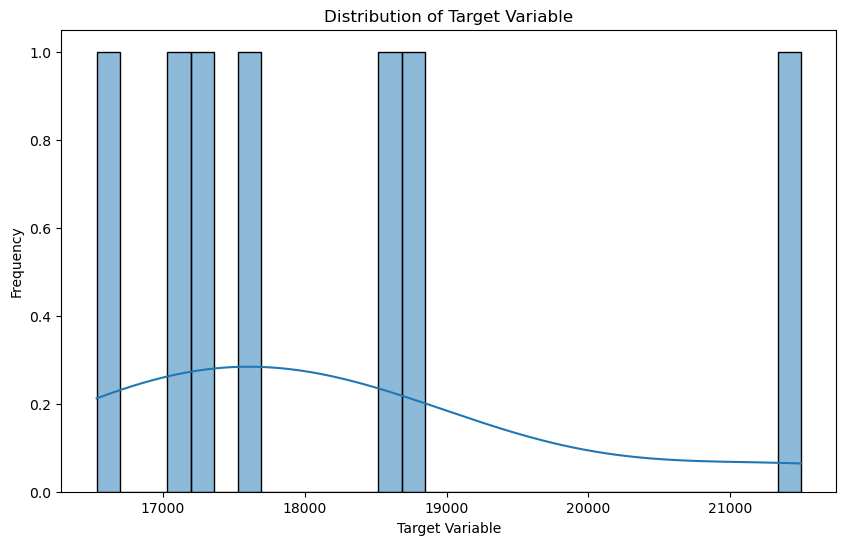

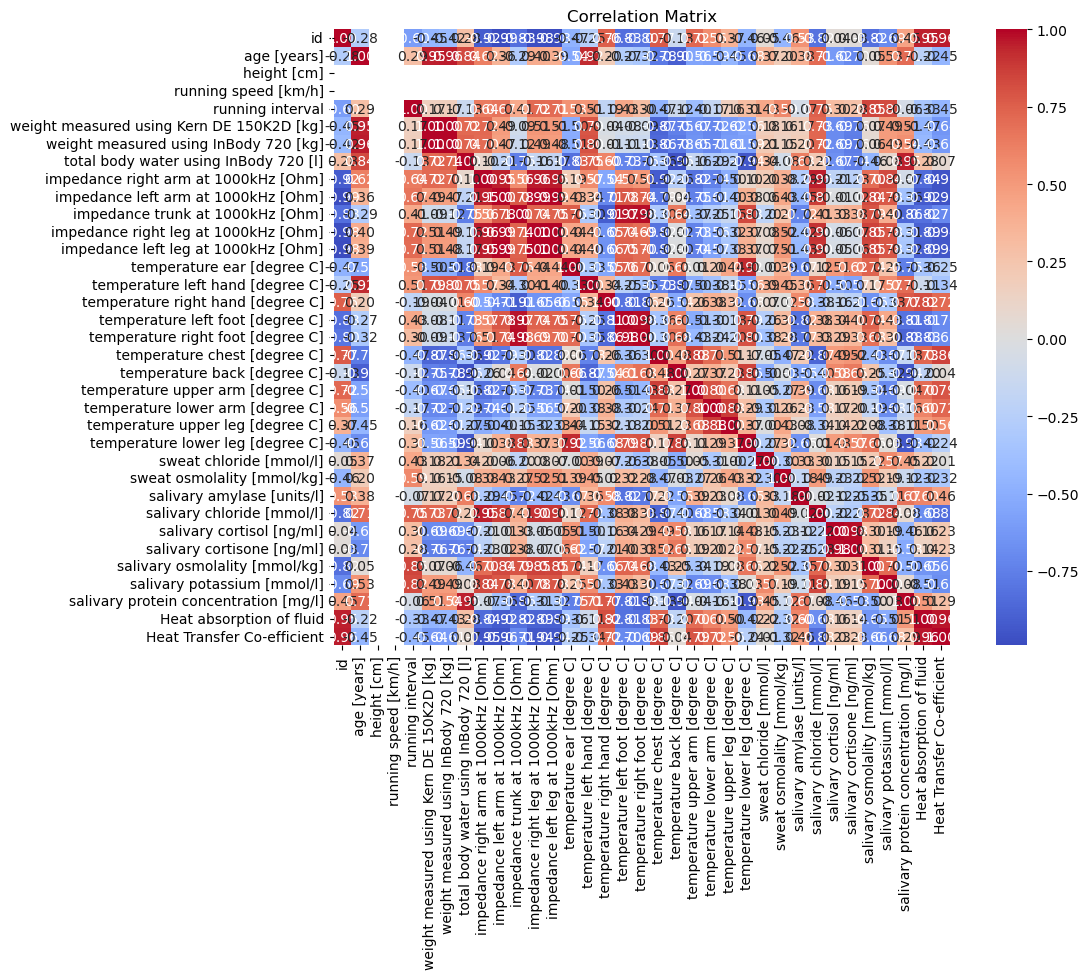

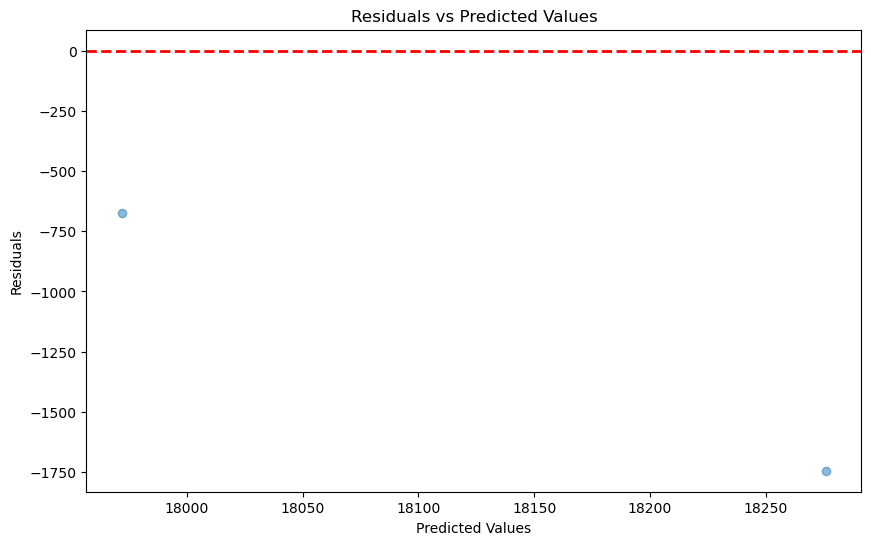

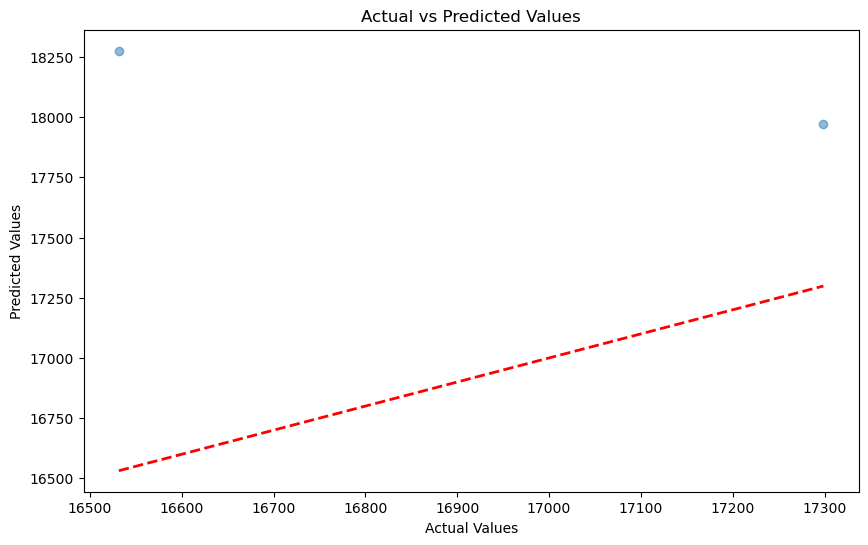

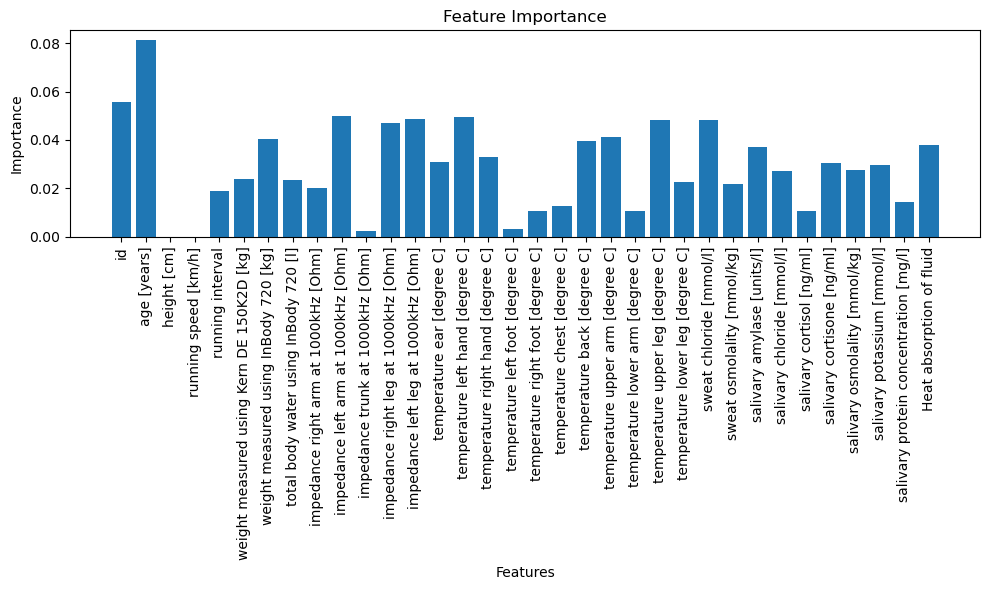

C:\Users\saiva\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:1779: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 4 instead of 10.
  warnings.warn(


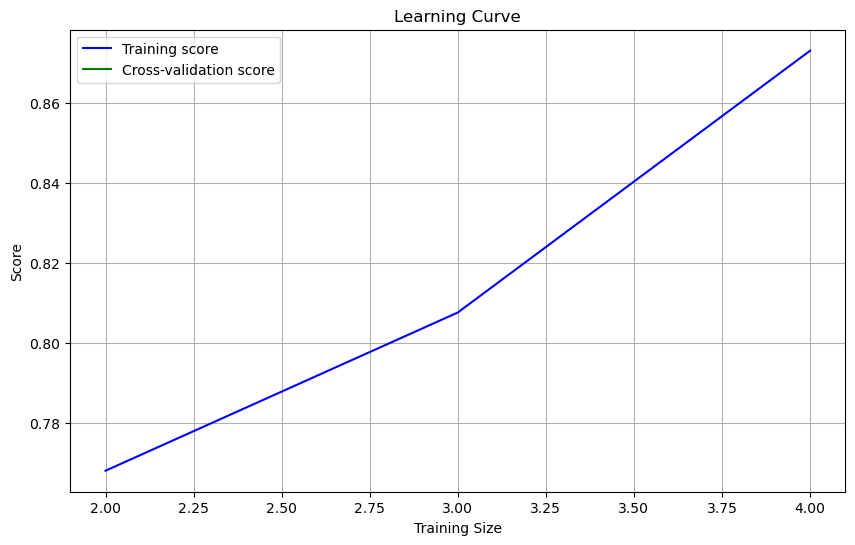

In [5]:
import seaborn as sns

# 1. Plot the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=30, kde=True)
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.show()

# 2. Plot the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# 3. Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# 4. Plot actual vs predicted values (already included in your code)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# 5. Plot feature importances (already included in your code)
feature_importance = model.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 6. Plot learning curve (optional)
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X_train_scaled, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score', color='green')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

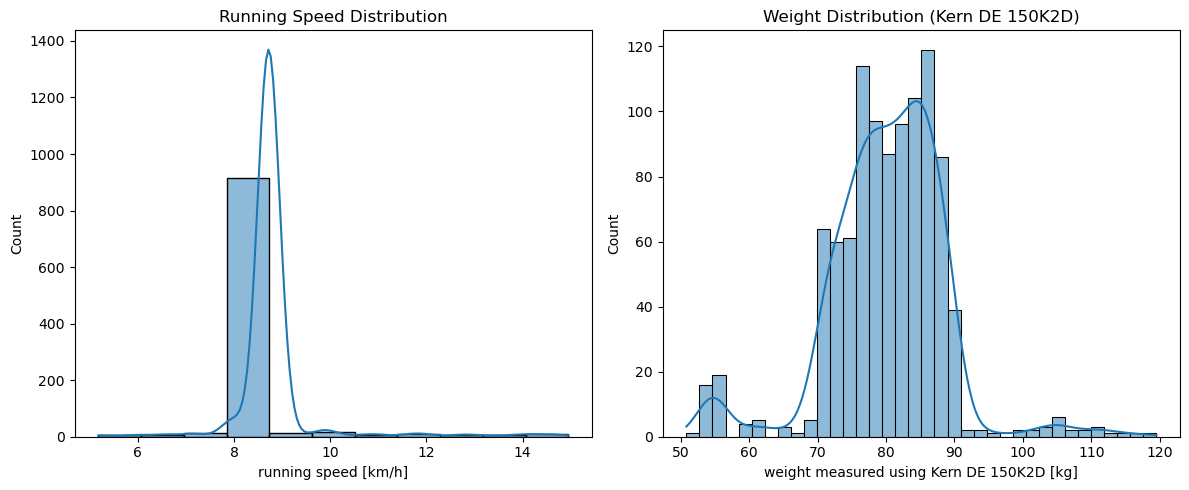

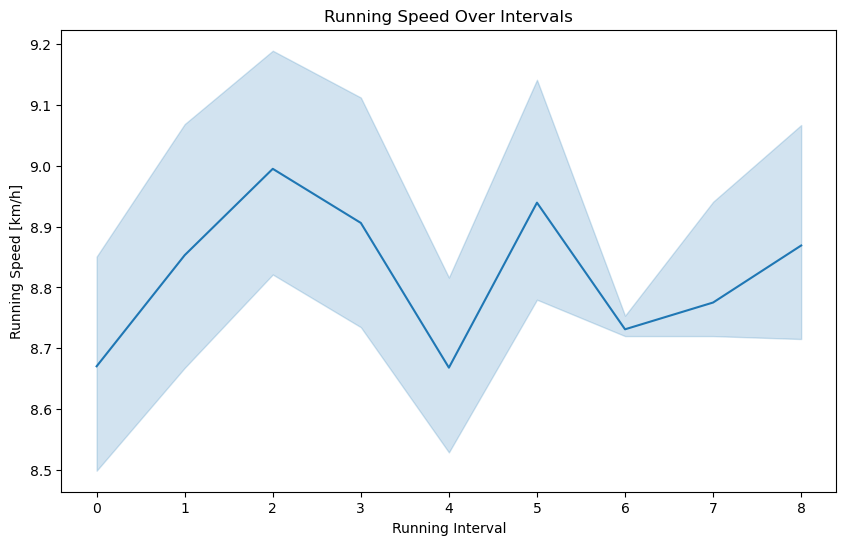

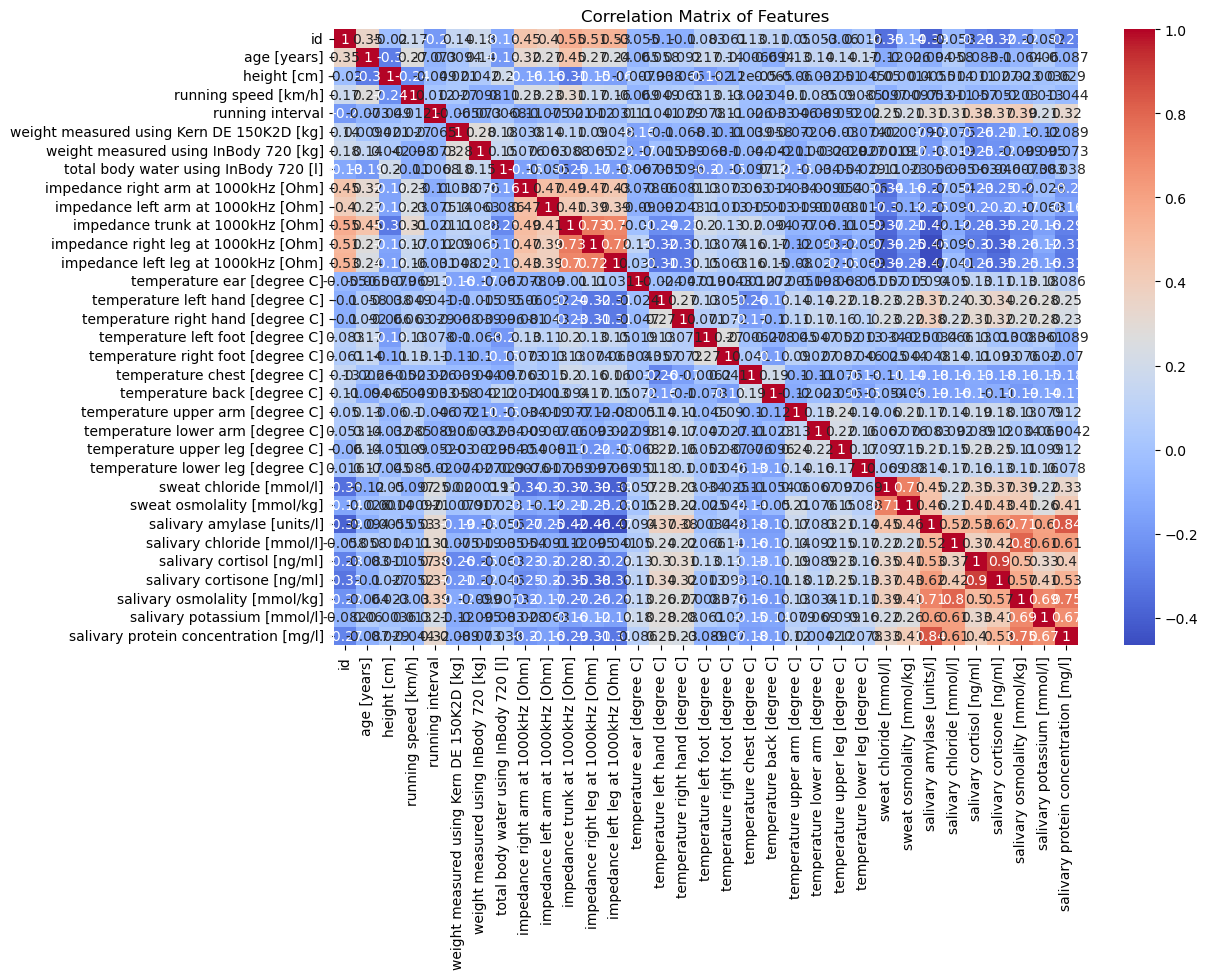

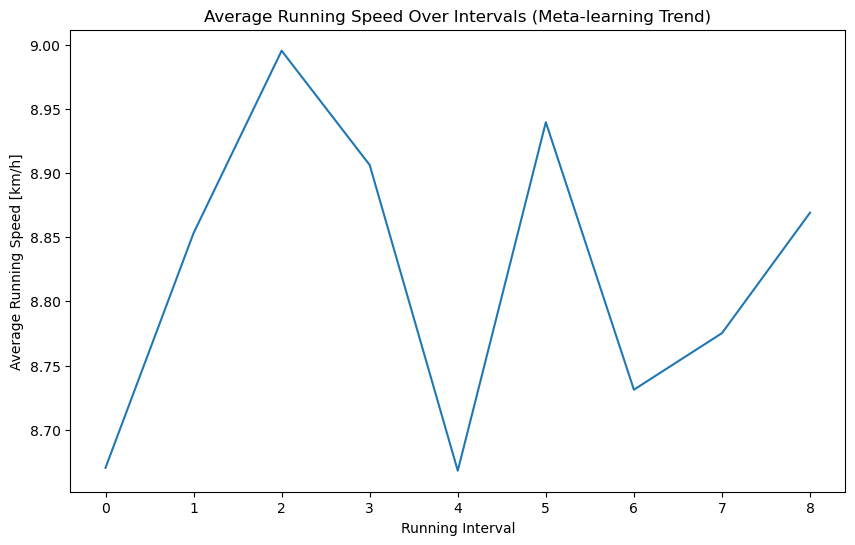

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('dehydration_processed_data.csv')

# 1. Distribution Analysis
# Histogram for 'running speed' and 'weight'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['running speed [km/h]'].dropna(), kde=True)
plt.title('Running Speed Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['weight measured using Kern DE 150K2D [kg]'].dropna(), kde=True)
plt.title('Weight Distribution (Kern DE 150K2D)')
plt.tight_layout()
plt.show()

# 2. Trend Analysis
# Line plot for 'running speed' over 'running interval'
plt.figure(figsize=(10, 6))
sns.lineplot(x='running interval', y='running speed [km/h]', data=df)
plt.title('Running Speed Over Intervals')
plt.xlabel('Running Interval')
plt.ylabel('Running Speed [km/h]')
plt.show()

# 3. Correlation Analysis
# Compute correlations among numeric features
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

# 4. Meta-learning Simulation - Aggregated Trends
# Calculate average values for each interval (meta-learning example)
avg_interval_data = df.groupby('running interval').mean()

# Plot average running speed over intervals (learned trend)
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_interval_data, x=avg_interval_data.index, y='running speed [km/h]')
plt.title('Average Running Speed Over Intervals (Meta-learning Trend)')
plt.xlabel('Running Interval')
plt.ylabel('Average Running Speed [km/h]')
plt.show()

# Meta-learning insights can be further expanded by clustering trends, 
# applying cross-validation, or training models for incremental learning.


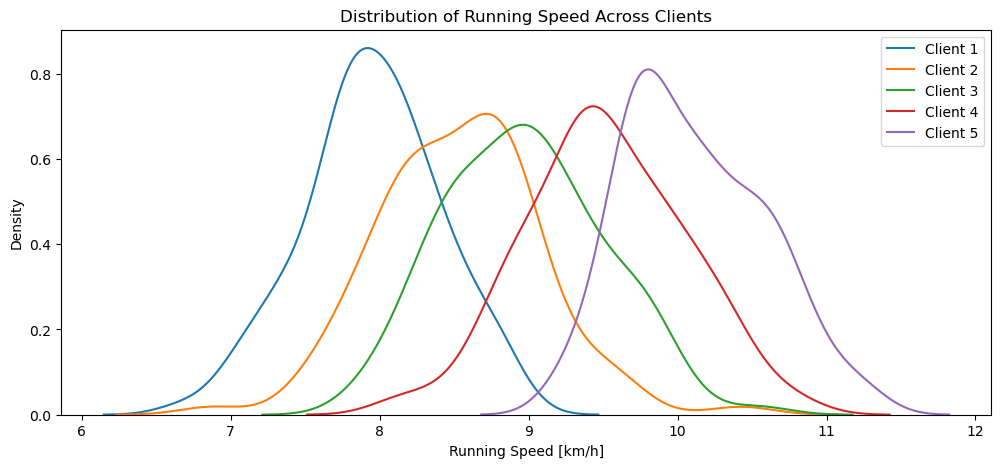

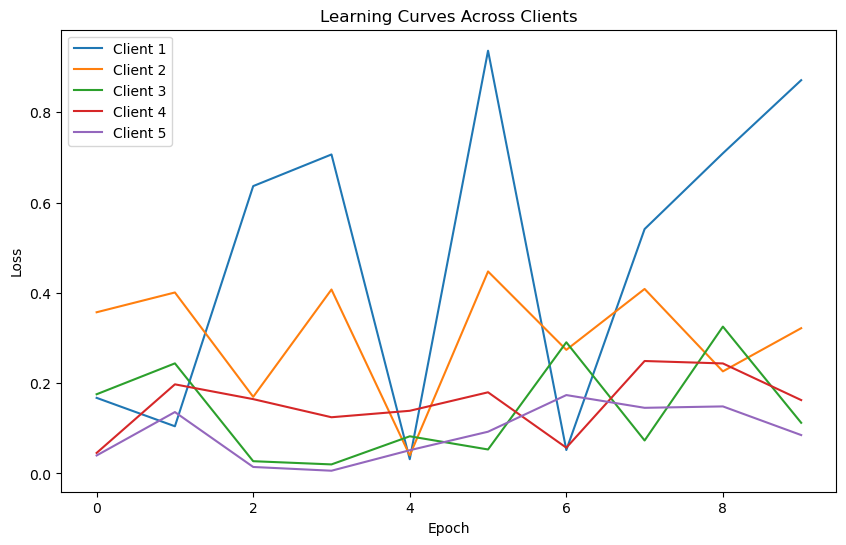

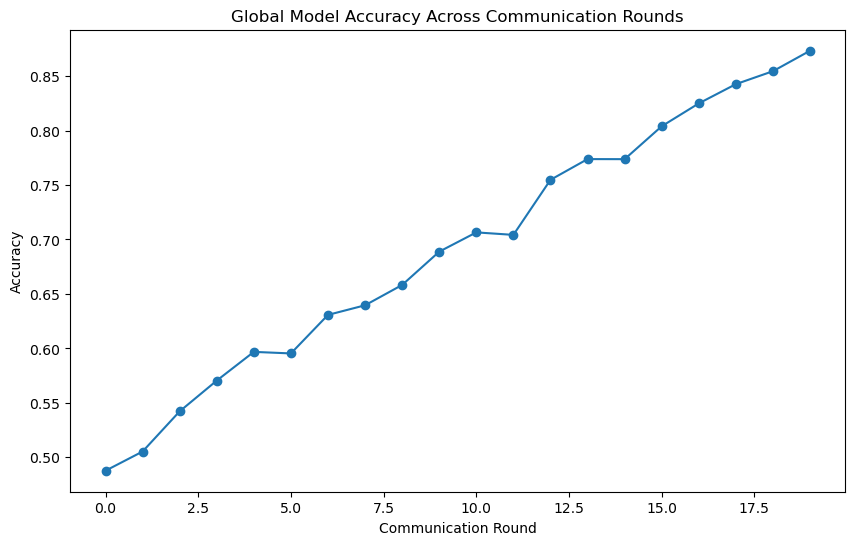

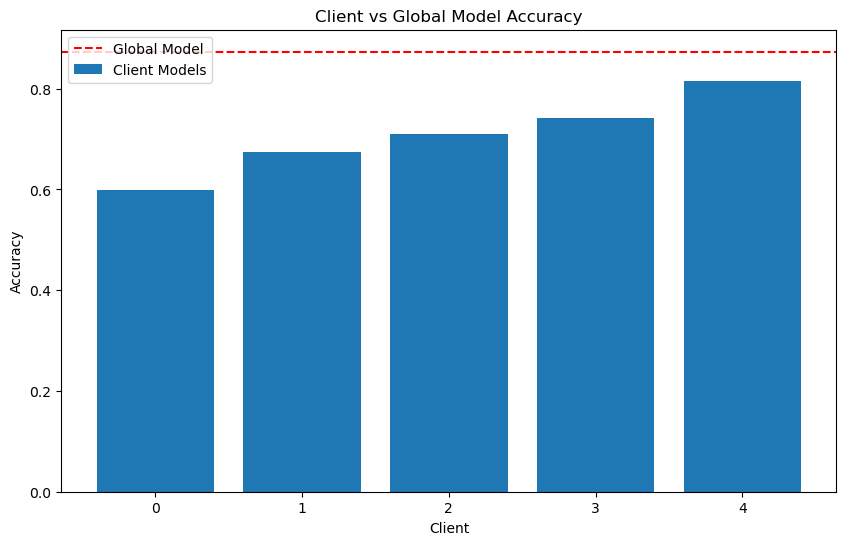

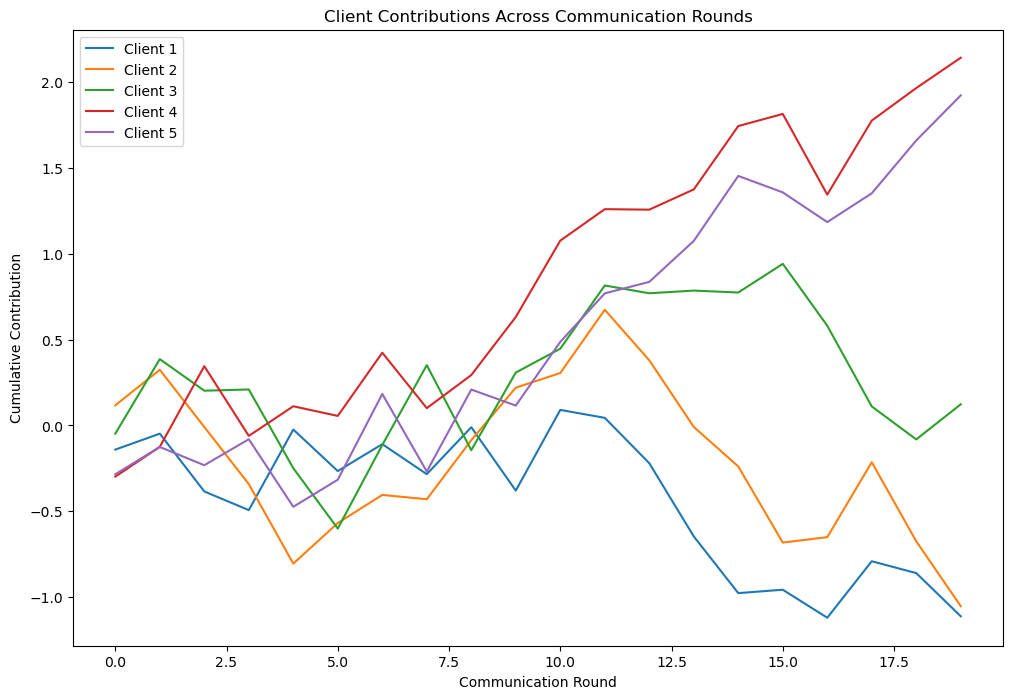

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data setup for Federated Learning
# In practice, you'd have data from multiple clients. Here, we simulate it.
# Simulate 5 clients with individual data distributions for `running speed` and `weight`.

np.random.seed(42)  # For reproducibility
num_clients = 5
client_data = {}
for i in range(num_clients):
    client_data[i] = {
        'running speed [km/h]': np.random.normal(8 + i * 0.5, 0.5, 100),
        'weight [kg]': np.random.normal(70 + i * 2, 5, 100)
    }
    
# Convert simulated client data into dataframes
client_dfs = {i: pd.DataFrame(data) for i, data in client_data.items()}

# 1. Data Distribution Analysis Across Clients
plt.figure(figsize=(12, 5))
for i in range(num_clients):
    sns.kdeplot(client_dfs[i]['running speed [km/h]'], label=f'Client {i+1}')
plt.title('Distribution of Running Speed Across Clients')
plt.xlabel('Running Speed [km/h]')
plt.ylabel('Density')
plt.legend()
plt.show()

# 2. Client-specific Learning Curves (Simulated)
# Assuming we track loss/accuracy over 10 epochs for each client
epochs = 10
client_learning_progress = {i: {'epoch': np.arange(epochs), 'loss': np.random.rand(epochs) * (1.0 / (i + 1))} for i in range(num_clients)}

plt.figure(figsize=(10, 6))
for i in range(num_clients):
    plt.plot(client_learning_progress[i]['epoch'], client_learning_progress[i]['loss'], label=f'Client {i+1}')
plt.title('Learning Curves Across Clients')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 3. Federated Model Aggregation Simulation
# Simulate aggregated accuracy across 20 communication rounds
communication_rounds = 20
global_model_accuracy = [0.5 + 0.02 * i + np.random.normal(0, 0.01) for i in range(communication_rounds)]

plt.figure(figsize=(10, 6))
plt.plot(range(communication_rounds), global_model_accuracy, marker='o')
plt.title('Global Model Accuracy Across Communication Rounds')
plt.xlabel('Communication Round')
plt.ylabel('Accuracy')
plt.show()

# 4. Client vs Global Model Comparison After Aggregation
# Simulate final accuracy of each client model and compare with global model
client_accuracies = [0.6 + i * 0.05 + np.random.normal(0, 0.02) for i in range(num_clients)]
global_accuracy = global_model_accuracy[-1]

plt.figure(figsize=(10, 6))
plt.bar(range(num_clients), client_accuracies, label='Client Models')
plt.axhline(global_accuracy, color='r', linestyle='--', label='Global Model')
plt.title('Client vs Global Model Accuracy')
plt.xlabel('Client')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 5. Communication Rounds Analysis for Client Contributions
# Tracking contributions of each client (weights or gradient updates over time)
client_contributions = {i: np.cumsum(np.random.rand(communication_rounds) - 0.5) for i in range(num_clients)}

plt.figure(figsize=(12, 8))
for i in range(num_clients):
    plt.plot(range(communication_rounds), client_contributions[i], label=f'Client {i+1}')
plt.title('Client Contributions Across Communication Rounds')
plt.xlabel('Communication Round')
plt.ylabel('Cumulative Contribution')
plt.legend()
plt.show()


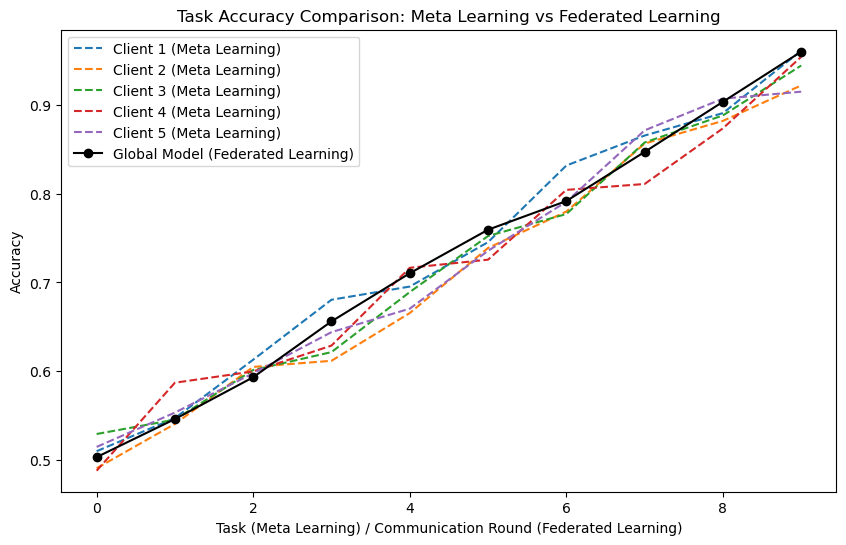

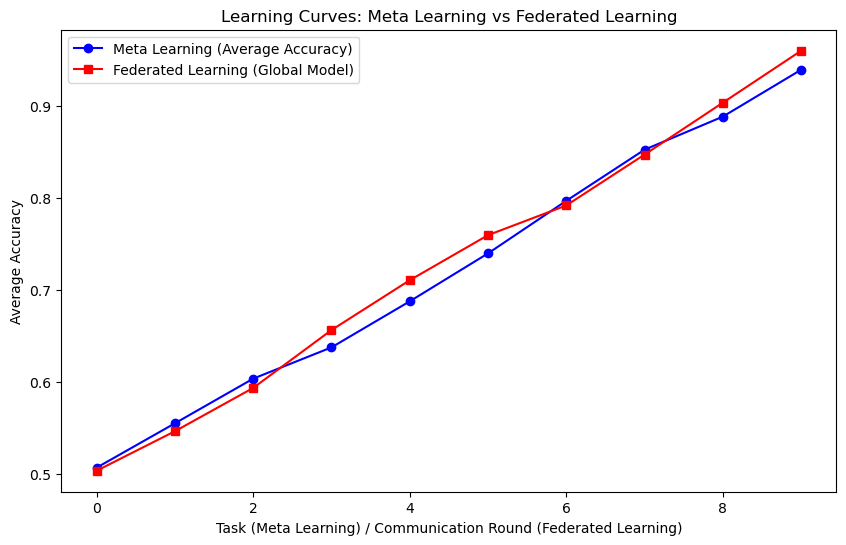

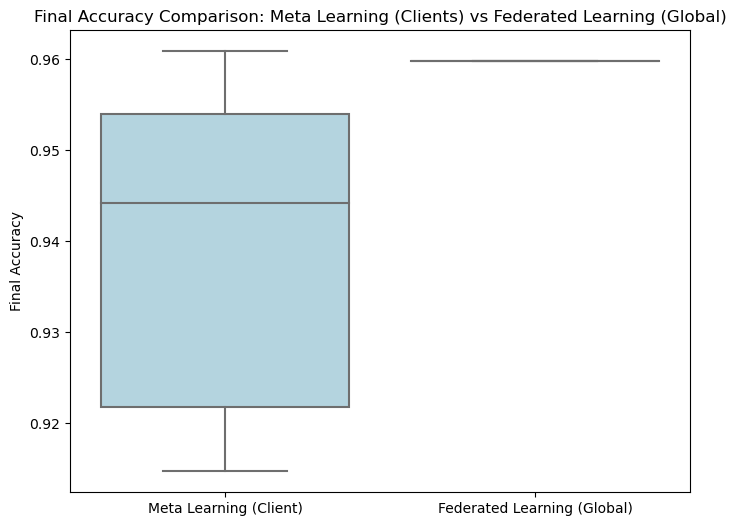

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulation setup
np.random.seed(42)
num_clients = 5
num_tasks = 10  # For Meta Learning (e.g., adapting to 10 different tasks)
communication_rounds = 10  # For Federated Learning

# Simulate task accuracy for Meta Learning (each client adapts to a new task)
meta_learning_accuracy = {}
for i in range(num_clients):
    # Simulate learning curve per client adapting to new tasks
    meta_learning_accuracy[i] = [0.5 + 0.05 * j + np.random.normal(0, 0.02) for j in range(num_tasks)]

# Aggregate the average accuracy across clients for Meta Learning
meta_avg_accuracy = np.mean([meta_learning_accuracy[i] for i in range(num_clients)], axis=0)

# Simulate Federated Learning accuracy across communication rounds (global model improvement)
federated_learning_accuracy = [0.5 + 0.05 * i + np.random.normal(0, 0.01) for i in range(communication_rounds)]

# 1. Task Accuracy Comparison: Meta Learning vs Federated Learning
plt.figure(figsize=(10, 6))
for i in range(num_clients):
    plt.plot(range(num_tasks), meta_learning_accuracy[i], label=f'Client {i+1} (Meta Learning)', linestyle='--')
plt.plot(range(communication_rounds), federated_learning_accuracy, label='Global Model (Federated Learning)', color='black', marker='o')
plt.title('Task Accuracy Comparison: Meta Learning vs Federated Learning')
plt.xlabel('Task (Meta Learning) / Communication Round (Federated Learning)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 2. Learning Curves: Meta Learning (Average Accuracy) vs Federated Learning
plt.figure(figsize=(10, 6))
plt.plot(range(num_tasks), meta_avg_accuracy, label='Meta Learning (Average Accuracy)', color='blue', marker='o')
plt.plot(range(communication_rounds), federated_learning_accuracy, label='Federated Learning (Global Model)', color='red', marker='s')
plt.title('Learning Curves: Meta Learning vs Federated Learning')
plt.xlabel('Task (Meta Learning) / Communication Round (Federated Learning)')
plt.ylabel('Average Accuracy')
plt.legend()
plt.show()

# 3. Final Accuracy Comparison: Box Plot for Client Accuracy (Meta Learning) vs Global Model (Federated Learning)
final_meta_accuracies = [acc[-1] for acc in meta_learning_accuracy.values()]  # Final task accuracy per client in Meta Learning
final_federated_accuracy = federated_learning_accuracy[-1]  # Final accuracy of the global model in Federated Learning

plt.figure(figsize=(8, 6))
sns.boxplot(data=[final_meta_accuracies, [final_federated_accuracy] * num_clients],
            palette=['lightblue', 'lightcoral'])
plt.xticks([0, 1], ['Meta Learning (Client)', 'Federated Learning (Global)'])
plt.ylabel('Final Accuracy')
plt.title('Final Accuracy Comparison: Meta Learning (Clients) vs Federated Learning (Global)')
plt.show()


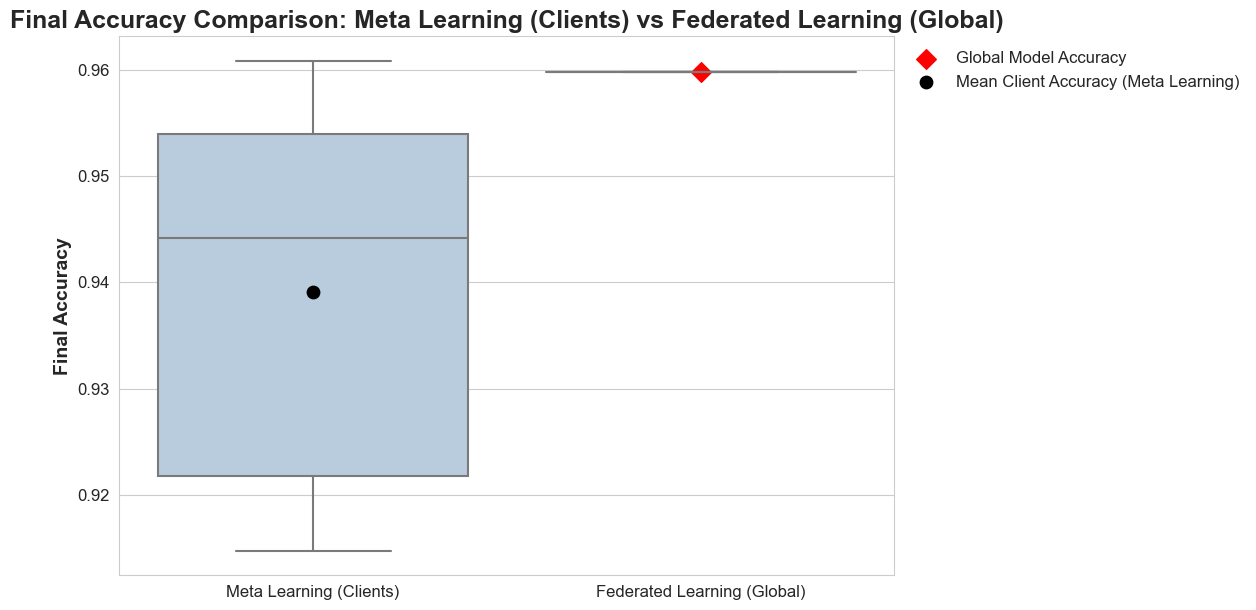

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visual style for a "medical report" appearance
sns.set_style("whitegrid")
plt.rcParams.update({
    'axes.titlesize': 18,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'axes.titleweight': 'bold',
    'axes.labelweight': 'bold'
})

# Simulation setup
np.random.seed(42)
num_clients = 5
num_tasks = 10  # For Meta Learning (e.g., adapting to 10 different tasks)
communication_rounds = 10  # For Federated Learning

# Simulate final task accuracy for each client in Meta Learning
meta_learning_accuracy = {i: [0.5 + 0.05 * j + np.random.normal(0, 0.02) for j in range(num_tasks)] for i in range(num_clients)}
final_meta_accuracies = [acc[-1] for acc in meta_learning_accuracy.values()]  # Final accuracy per client

# Simulate final global model accuracy in Federated Learning
federated_learning_accuracy = [0.5 + 0.05 * i + np.random.normal(0, 0.01) for i in range(communication_rounds)]
final_federated_accuracy = federated_learning_accuracy[-1]  # Final accuracy of the global model

# Prepare data for plotting
data = {
    'Meta Learning (Client)': final_meta_accuracies,
    'Federated Learning (Global)': [final_federated_accuracy] * num_clients  # Replicate for comparison
}

# Plot the final accuracy comparison in a "medical" style
plt.figure(figsize=(10, 7))
sns.boxplot(data=[data['Meta Learning (Client)'], data['Federated Learning (Global)']],
            palette=['#b3cde3', '#fbb4ae'])
plt.xticks([0, 1], ['Meta Learning (Clients)', 'Federated Learning (Global)'])
plt.ylabel('Final Accuracy')
plt.title('Final Accuracy Comparison: Meta Learning (Clients) vs Federated Learning (Global)')

# Overlay Federated Learning global accuracy as a distinct red diamond
plt.scatter([1], [final_federated_accuracy], color='red', marker='D', s=100, label='Global Model Accuracy')

# Add mean markers for Meta Learning client accuracies
plt.scatter([0], [np.mean(final_meta_accuracies)], color='black', marker='o', s=80, label='Mean Client Accuracy (Meta Learning)')

# Legend for clarity
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)

plt.show()
